<a href="https://colab.research.google.com/github/OleksiiLatypov/DRU_Data_Science_Fundamentals/blob/main/Kaggle/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3948%2F32624%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240213T094208Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4bd0da1cad60169316c1fef1e0c50ca9f9a001942eb845a87b078a2f47066ae31c88cf62f1710f1495f85ea0fcbae65795bb5aade9fa46d6879fdb9791129310d6e45dec1751b44e306a50309f796535bdd9b377dc46e1eb018e1f54006bc506aa692e0f0d01d830d83e10d2ce956f67123f69b9b97a8ea612cc320793fd142652608e084beb286c3c360d0a7b40417957c9f3966e68f5a08a630ffb5eeb4cb1121e81ec0b898cc2b8c58fdda89dfc24149026878e2fd42b6e59c878266e9b768d3d5b89c60f5767f666567a2672b607b3e836204e6d3dab50bfc3d5647dbee3ecc75341f6c014138c5e01e5aac824ae11905efe3e76f7c67216f48a9834a905'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 193828 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv("/kaggle/input/train.csv")
test = pd.read_csv("/kaggle/input/test.csv")
submission = pd.read_csv("/kaggle/input/sampleSubmission.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Concatenate train and test data

In [5]:
all_data_temp = pd.concat([train, test])
all_data_temp.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [6]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


## Feature Engineering

### Create new features
based on datetime column

In [7]:
# from datetime import datetime

# all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0]) # Create date feature
# all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # Create year feature
# all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # Create month feature
# all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # Create hour feature
# all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday()) # Create weekday feature

all_data['datetime'] = pd.to_datetime(all_data['datetime'])

# Create date features
all_data['date'] = all_data['datetime'].dt.date
all_data['year'] = all_data['datetime'].dt.year
all_data['month'] = all_data['datetime'].dt.month
all_data['hour'] = all_data['datetime'].dt.hour

# Create weekday feature
all_data['weekday'] = all_data['datetime'].dt.weekday

In [8]:
#all_data['date']
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,1,4,5


### Change categorical data type for memory reduction

In [9]:
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'weekday', 'month', 'year', 'hour']

for feature in categorical_features:
    all_data[feature] = all_data[feature].astype("category")

all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,19,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,20,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,21,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,22,0


### Separate train and test data. Assign train target value(y)

In [10]:
# train = all_data[pd.notnull(all_data['count'])]
# test = all_data[~pd.notnull(all_data['count'])]
# y = train['count']
# test
train = all_data[all_data['count'].notnull()]
test = all_data[all_data['count'].isnull()]
y = train['count']
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
10886,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN,2011-01-20,2011,1,0,3
10887,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN,2011-01-20,2011,1,1,3
10888,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN,2011-01-20,2011,1,2,3
10889,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN,2011-01-20,2011,1,3,3
10890,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN,2011-01-20,2011,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,19,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,20,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,21,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,22,0


<ipython-input-11-5a42d80cb2d2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['count']));


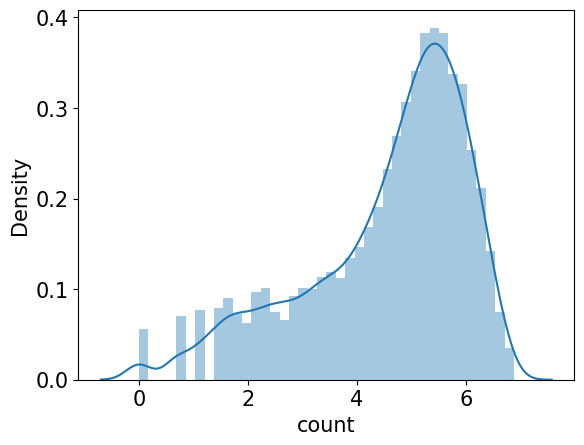

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15) # Set font size to 15
sns.distplot(np.log(train['count']));

**Distribution of log transformation of count feature**

<ipython-input-12-f43fa0d7bcfb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['count']));


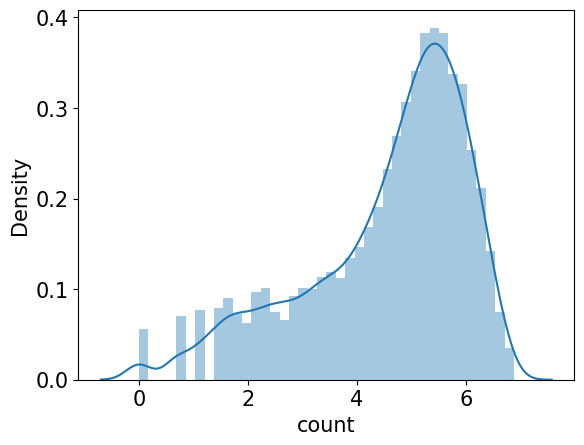

In [12]:
sns.distplot(np.log(train['count']));

<Axes: xlabel='year', ylabel='count'>

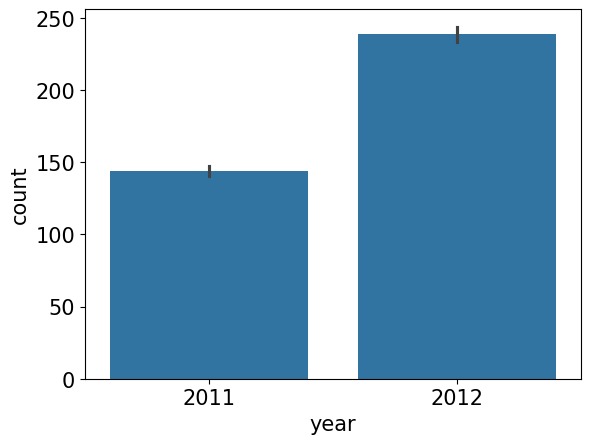

In [13]:
sns.barplot(x='year', y='count', data=train)

<Axes: xlabel='month', ylabel='count'>

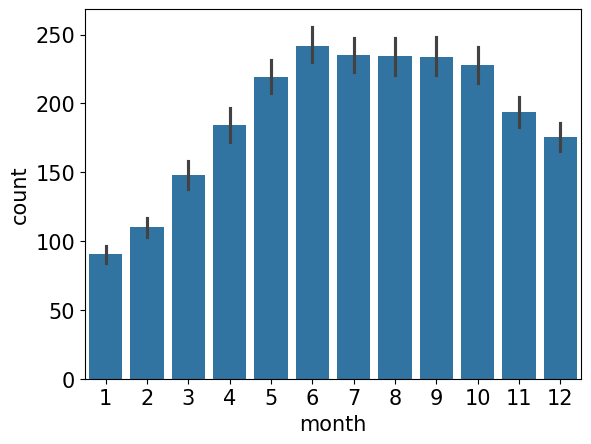

In [14]:
sns.barplot(x='month', y='count', data=train)

<Axes: xlabel='weekday', ylabel='count'>

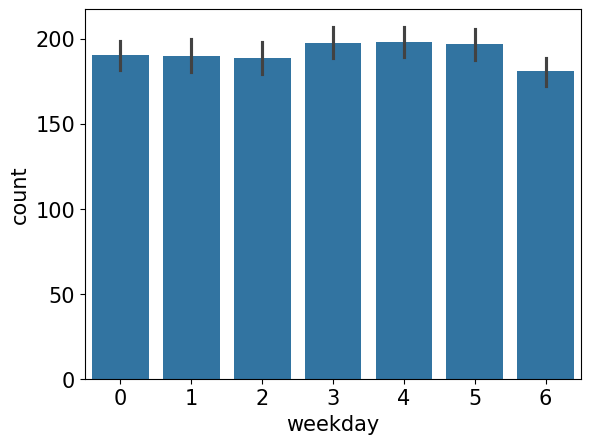

In [15]:
sns.barplot(x='weekday', y='count', data=train)

<Axes: xlabel='hour', ylabel='count'>

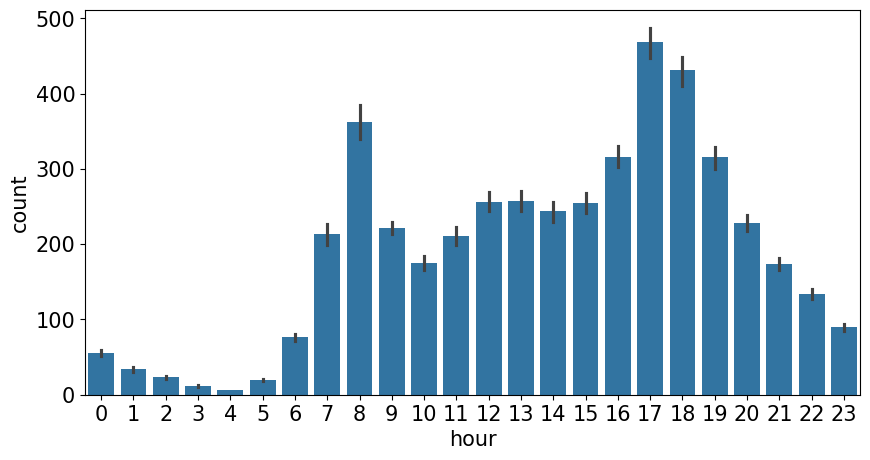

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='count', data=train)

<Axes: xlabel='count', ylabel='season'>

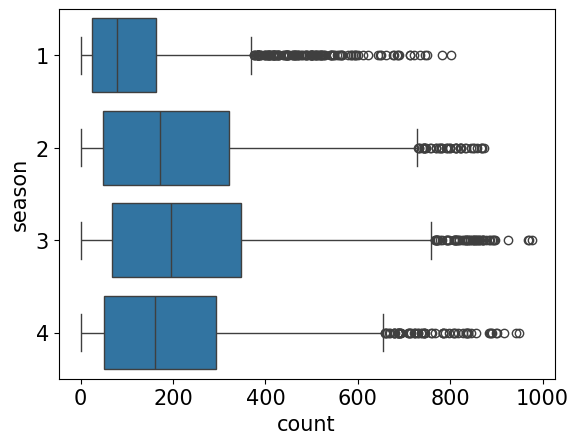

In [17]:
sns.boxplot(x='count', y='season', data=train)
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter

<Axes: xlabel='count', ylabel='weather'>

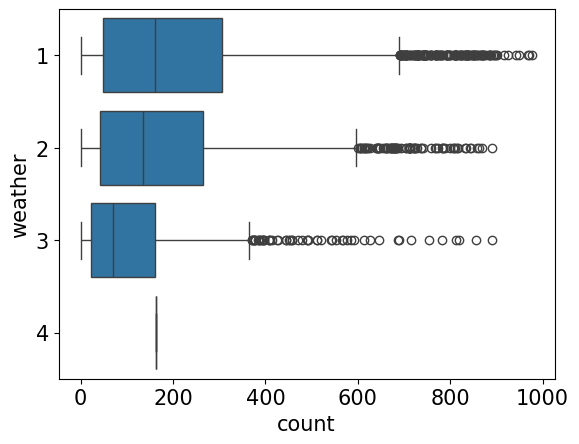

In [18]:
sns.boxplot(x='count', y='weather', data=train)
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<Axes: xlabel='count', ylabel='holiday'>

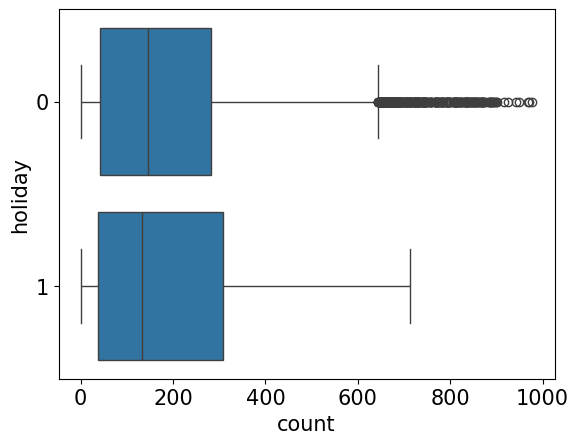

In [19]:
sns.boxplot(x='count', y='holiday', data=train)
#holiday - whether the day is considered a holiday

<Axes: xlabel='count', ylabel='workingday'>

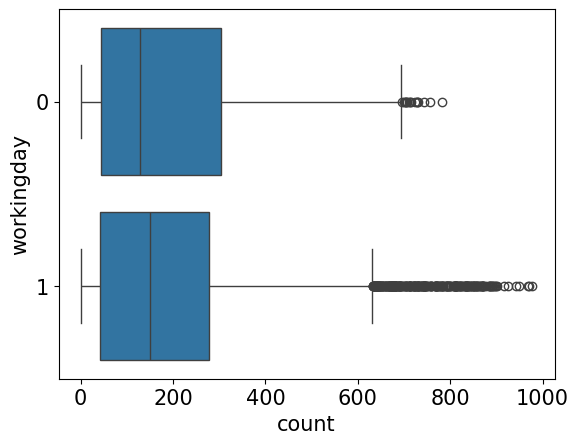

In [20]:
sns.boxplot(x='count', y='workingday', data=train)

Text(0.5, 1.0, 'Scatter Plot of Count against Temperature')

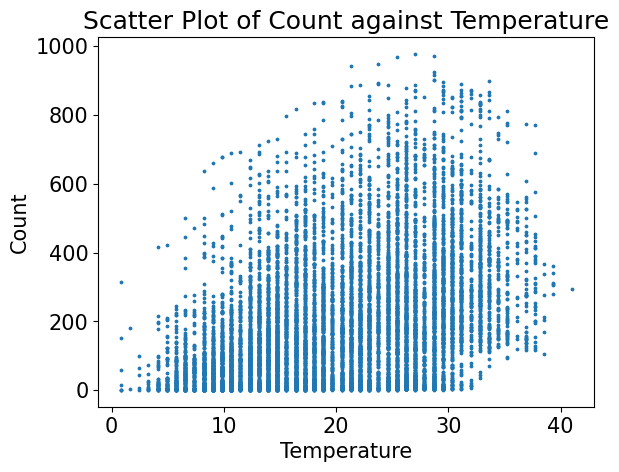

In [21]:
plt.scatter(train['temp'], train['count'], s=3)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot of Count against Temperature')

Text(0, 0.5, 'Count')

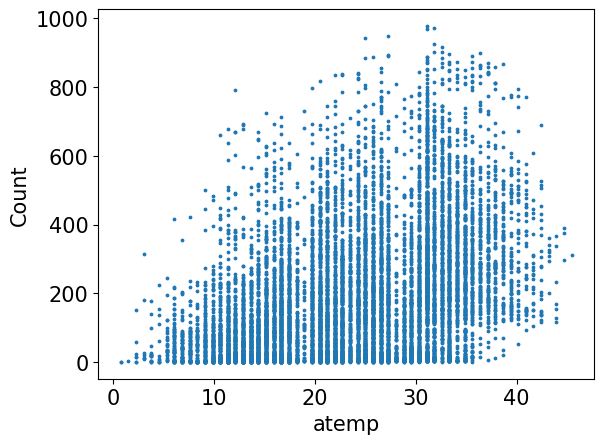

In [22]:
plt.scatter(train['atemp'], train['count'], s=3)
plt.xlabel('atemp')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

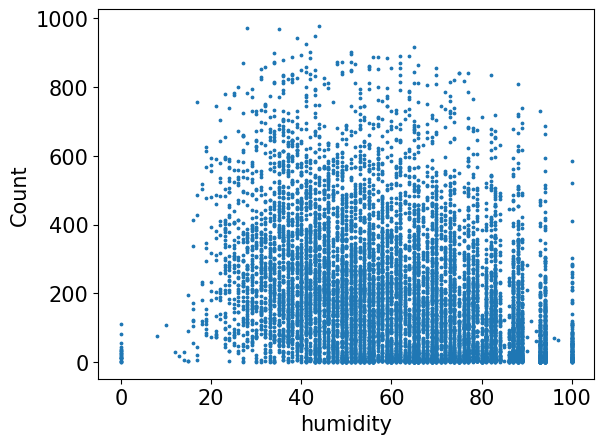

In [23]:
plt.scatter(train['humidity'], train['count'], s=3)
plt.xlabel('humidity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

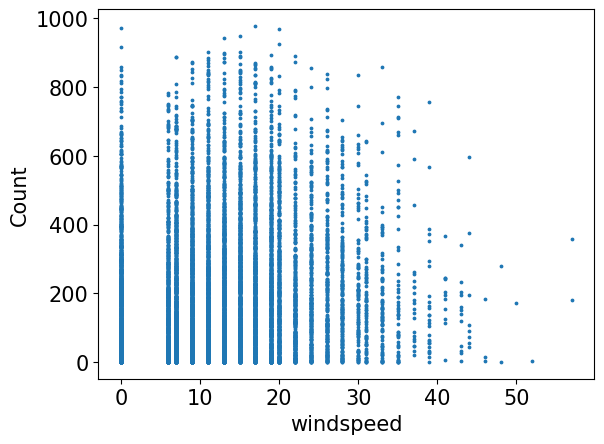

In [24]:
plt.scatter(train['windspeed'], train['count'], s=3)
plt.xlabel('windspeed')
plt.ylabel('Count')

In [25]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


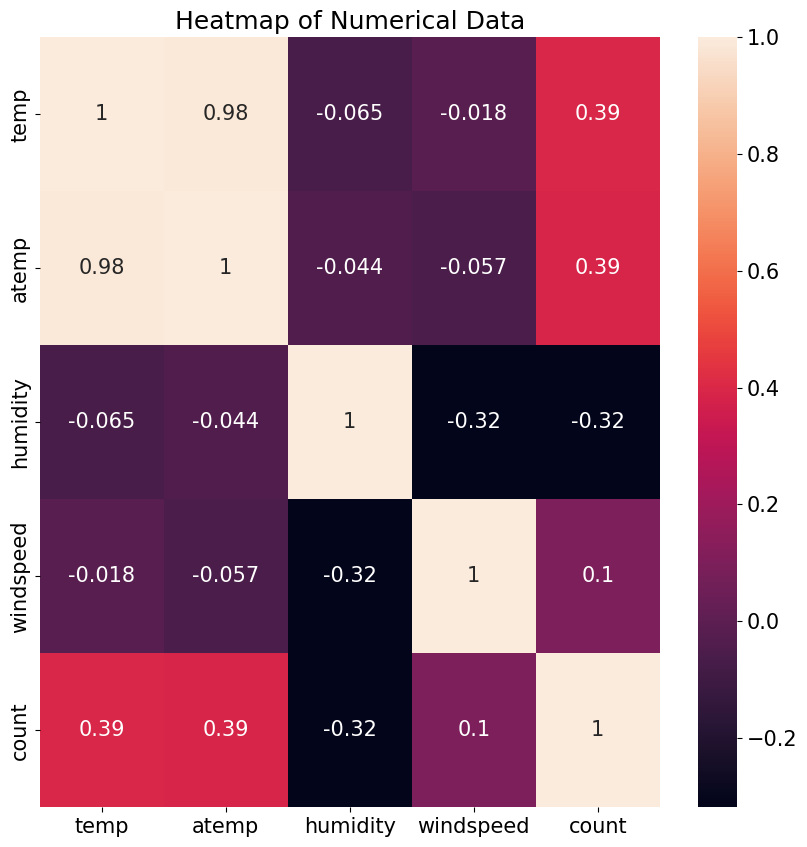

In [26]:
corrmatrix = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax= plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrmatrix, annot=True) # Plot heatmap
ax.set(title='Heatmap of Numerical Data');

### Drop useless features

In [27]:
drop_features = ['count', 'casual', 'registered', 'datetime', 'date', 'datetime', 'windspeed', 'month']

X_train = train.drop(drop_features, axis=1)
X_test = test.drop(drop_features, axis=1)

In [28]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   year        10886 non-null  category
 8   hour        10886 non-null  category
 9   weekday     10886 non-null  category
dtypes: category(7), float64(2), int64(1)
memory usage: 416.4 KB


## Train Model and Measure Model Performance

### Evaluation score(RMSLE) function

In [30]:
def rmsle(y_true, y_pred, convert_exp=True):
    # Apply exponential transformation function
    if convert_exp:
        y_true, y_pred = np.exp(y_true), np.exp(y_pred)

    # Convert missing value to zero after log transformation
    log_true = np.nan_to_num(np.array([np.log(y+1) for y in y_true]))
    log_pred = np.nan_to_num(np.array([np.log(y+1) for y in y_pred]))

    # Compute RMSLE
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

### Linear regression model

In [31]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Step 1: Create Model
linear_reg_model = LinearRegression()

# Step 2: Train Model
log_y = np.log1p(y)  # Log Transformation of Target Value y
linear_reg_model.fit(X_train, log_y)

# Step 3: Predict
preds = linear_reg_model.predict(X_train)

# Step 4: Evaluate RMSLE
rmsle_value = rmsle(log_y, preds, True)
print('Linear Regression RMSLE:', rmsle_value)

# Step 5: Evaluate R2 Score
r2_value = r2_score(log_y, preds)
print('Linear Regression R2 Score:', r2_value)


Linear Regression RMSLE: 0.9803697923313485
Linear Regression R2 Score: 0.48527177920492315


### Ridge Model (Apply Gridsearch)

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Step 1: Create Model
ridge_model = Ridge()

# Step 2-1 : Create GridSearchCV Object
# Hyper-parameter List
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
# Evaluate Function for Cross-Validation (RMSLE score)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# Create GridSearchCV Object (with Ridge)
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                      param_grid=ridge_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

# Step 2-2 : Perform Grid Search
log_y = np.log1p(y) # Log Transformation of Target Value y
gridsearch_ridge_model.fit(X_train, log_y) # Train (Grid Search)

print('Best Parameter:', gridsearch_ridge_model.best_params_)

# Step 3 : Predict
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# Step 4 : Evaluate
print('Ridge Regression RMSLE:', rmsle(log_y, preds, True))

Best Parameter: {'alpha': 0.1, 'max_iter': 3000}
Ridge Regression RMSLE: 0.9803697718301282


### Lasso Model (Apply Gridsearch)

In [33]:
from sklearn.linear_model import Lasso

# Step 1: Create Model
lasso_model = Lasso()

# Step 2-1 : Create GridSearchCV Object
# Hyper-parameter List
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# Create GridSearchCV Object (with Lasso)
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)


# Step 2-2 : Perform Grid Search
log_y = np.log1p(y)
gridsearch_lasso_model.fit(X_train, log_y) # Train (Grid Search)

print('Best Parameter:', gridsearch_lasso_model.best_params_)

# Step 3 : Predict
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# Step 4 : Evaluate
print('Lasso Regression RMSLE:', rmsle(log_y, preds, True))

Best Parameter: {'alpha': 0.00125, 'max_iter': 3000}
Lasso Regression RMSLE: 0.9803727847762308


### Random Forest Regression Model (Apply Grid Search)

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Create Model
randomforest_model = RandomForestRegressor()

# Step 2-1 : Create GridSearchCV Object
# Hyper-parameter List
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
# Create GridSearchCV Object (with Random Forest Regression)
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)

# Step 2-2 : Perform Grid Search
log_y = np.log1p(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('Best Parameter:', gridsearch_random_forest_model.best_params_)


preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)


print('Random Forest Regression RMSLE:', rmsle(log_y, preds, True))

Best Parameter: {'n_estimators': 140, 'random_state': 42}
Random Forest Regression RMSLE: 0.10574735933163229


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

log_y = np.log1p(y)
rf_model.fit(X_train, log_y)
linear_reg_model.fit(X_train, log_y)

# Step 3: Predict
rf_pred = rf_model.predict(X_train)

# Step 4: Evaluate RMSLE
rmsle_value = rmsle(log_y, rf_pred, True)
print('RandomForest RMSLE:', rmsle_value)

# Step 5: Evaluate R2 Score
r2_value = r2_score(log_y, rf_pred)
print('RandomForest R2 Score:', r2_value)



RandomForest RMSLE: 0.1068937574936405
RandomForest R2 Score: 0.9934764939788825


In [36]:
rf_pred_test = np.round(np.exp(rf_model.predict(X_test)))
rf_pred_test

array([ 12.,   6.,   4., ..., 100., 100.,  45.])

### Random Forest Regression Model is the Best among four models!

## Submit

In [37]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

# figure, axes = plt.subplots(ncols=2)
# figure.set_size_inches(10, 4)

# sns.distplot(y, ax=axes[0], bins=50)
# axes[0].set_title('Train Data Distribution')
# sns.distplot(np.exp(randomforest_preds), ax=axes[1], bins=50)
# axes[1].set_title('Predicted Test Data Distribution');

### submit final predictions

In [38]:
submission['count'] = rf_pred_test
submission.to_csv('submission1.csv', index=False)